In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Number of sampling

In [2]:
N = 10000

# Constraints

$R$ in range $[200000,10000000]\ {\rm \Omega}$

$W$ in range $[200,1000]\ {\rm \mu m}$

$L$ in range $[40,500]\ {\rm \mu m}$

In [3]:
range_r  = [200000, 10000000]
range_w = [200, 1000]
range_l = [40, 500]

In [4]:
RANGE = torch.tensor([range_r, range_w, range_l], dtype=torch.float32)

In [5]:
ACT_sampling_mc =  torch.quasirandom.SobolEngine(3).draw(N)
ACT_sampling_mc = ACT_sampling_mc*(RANGE[:,1]-RANGE[:,0]) + RANGE[:,0]
ACT_sampling_mc = np.round(ACT_sampling_mc).T
ACT_sampling_mc.shape

torch.Size([3, 10000])

In [6]:
ACT_sampling_mc[1:,:] = ACT_sampling_mc[1:,:]/1000000
ACT_sampling_mc

tensor([[2.0000e+05, 5.1000e+06, 7.5500e+06,  ..., 8.2074e+06, 5.7574e+06,
         8.5736e+05],
        [2.0000e-04, 6.0000e-04, 4.0000e-04,  ..., 7.3700e-04, 5.3700e-04,
         9.3700e-04],
        [4.0000e-05, 2.7000e-04, 1.5500e-04,  ..., 3.7700e-04, 2.6200e-04,
         4.9200e-04]])

In [7]:
np.savetxt('./data/sampling_hard_sigmoid.csv', ACT_sampling_mc, fmt='%f', delimiter=',')

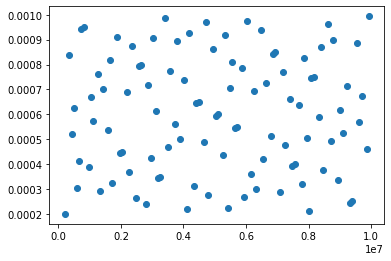

In [8]:
plt.scatter(ACT_sampling_mc[0,:100],ACT_sampling_mc[1,:100])